In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


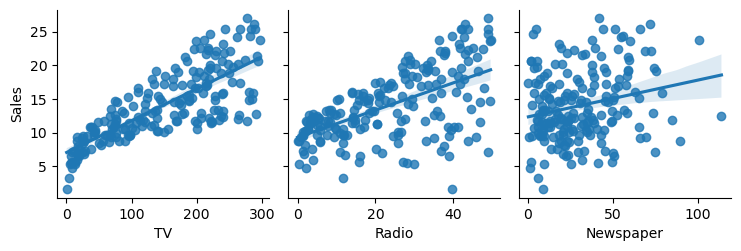

In [4]:
# Checking main assumptions of Linear Regression: linearity, normality, multicollinearity and homoscedasticity.
# 1) Assumption (Linearity)
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


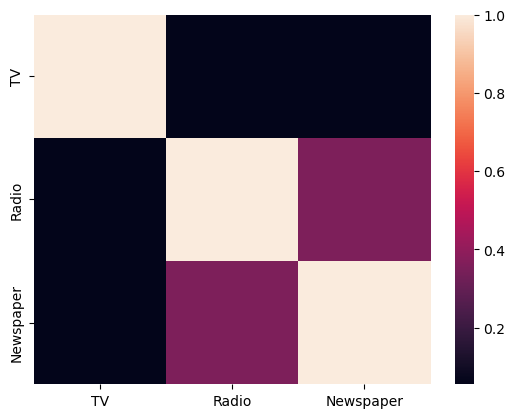

In [5]:
import matplotlib.pyplot as plt

# 2) Assumption (Multicollinearity):
df_features = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

sns.heatmap(data=df_features.corr())
plt.show()

In [6]:
# extract the features (independent variables)
X = df.drop(columns=['Unnamed: 0', 'Sales'])
print(X[0:10])

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
5    8.7   48.9       75.0
6   57.5   32.8       23.5
7  120.2   19.6       11.6
8    8.6    2.1        1.0
9  199.8    2.6       21.2


In [7]:
# extract the dependent (target) variable
y = df['Sales']
print(y[0:10])

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: Sales, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.80)

from sklearn.linear_model import LinearRegression
lregr = LinearRegression()
#from sklearn.linear_model import SGDRegressor
#sgdr_scaled = SGDRegressor()

# train model (Fit linear model) and evaluate model β coefficients
# NON Standardized
print("NON Standardized")
model = lregr.fit(X_train, y_train)
# print model intercept
print("β0 =", model.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model.coef_)

# estimate residuals
# predict
y_pred = model.predict(X_test)
# residuals is the differences between real y values and predicted y values
residuals = y_test - y_pred
print('Residuals:',residuals[:10])
#print(np.mean(residuals))
#print(np.std(residuals))

NON Standardized
β0 = 2.9948930304953265
[β1,β2,β3] = [ 0.04458402  0.19649703 -0.00278146]
Residuals: 18     1.242604
170    0.947719
107    1.680292
98     1.319703
177   -0.317863
182    2.162061
5     -5.582869
146   -1.909746
12    -1.569740
152    0.256420
Name: Sales, dtype: float64


Mean of Residuals -0.07230480536376216
Standard deviation of Residuals 2.096876321238568
p-value: 3.602868648223426e-09


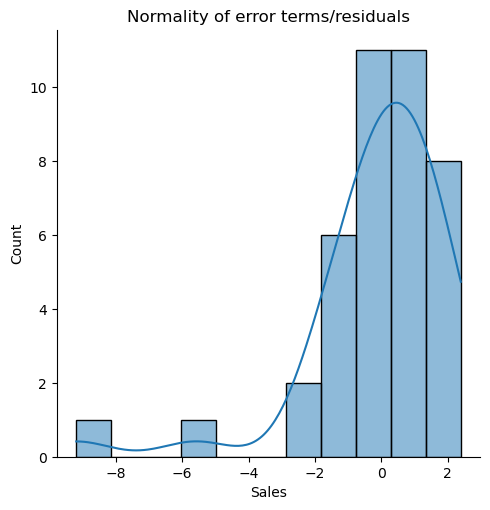

'\nmean_scaled_residuals = np.mean(residuals_scaled)\nprint("Mean of Scaled Residuals {}".format(mean_scaled_residuals))\nstd_scaled_residuals = np.std(residuals_scaled)\nprint("Standard deviation of Scaled Residuals {}".format(std_scaled_residuals))\n_, p = stats.normaltest(residuals_scaled)\nprint("p-value:",p)\n\nsns.displot(data=residuals_scaled,kde=True)\nplt.title(\'Normality of error terms/residuals (scaled)\')\nplt.show()\n'

In [9]:
from scipy import stats

# 3) Assumption (Normality of error terms/residuals):
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
std_residuals = np.std(residuals)
print("Standard deviation of Residuals {}".format(std_residuals))
_, p = stats.normaltest(residuals)
print("p-value:",p)

sns.displot(data=residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

"""
mean_scaled_residuals = np.mean(residuals_scaled)
print("Mean of Scaled Residuals {}".format(mean_scaled_residuals))
std_scaled_residuals = np.std(residuals_scaled)
print("Standard deviation of Scaled Residuals {}".format(std_scaled_residuals))
_, p = stats.normaltest(residuals_scaled)
print("p-value:",p)

sns.displot(data=residuals_scaled,kde=True)
plt.title('Normality of error terms/residuals (scaled)')
plt.show()
"""

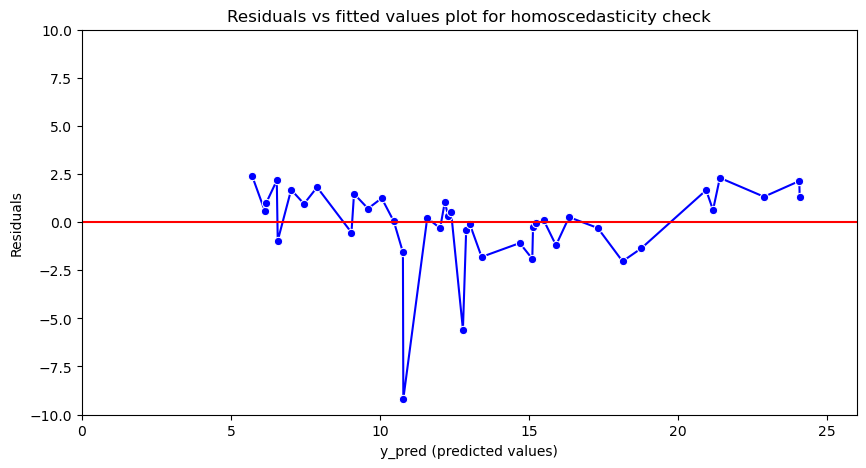

"\nplt.figure(figsize=(10,5))\nsns.lineplot(x=y_scaled_pred,y=residuals_scaled,marker='o',color='blue')\nplt.xlabel('y_scaled_pred (predicted values)')\nplt.ylabel('Scaled Residuals')\nplt.ylim(-1,1)\nplt.xlim(0,2.5)\nsns.lineplot(x=[0,2.5],y=[0,0],color='red')\nplt.title('Scaled Residuals vs fitted values plot for homoscedasticity check')\nplt.show()\n"

In [10]:
# 4) Homoscedasticity
plt.figure(figsize=(10,5))
sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred (predicted values)')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0],color='red')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()
"""
plt.figure(figsize=(10,5))
sns.lineplot(x=y_scaled_pred,y=residuals_scaled,marker='o',color='blue')
plt.xlabel('y_scaled_pred (predicted values)')
plt.ylabel('Scaled Residuals')
plt.ylim(-1,1)
plt.xlim(0,2.5)
sns.lineplot(x=[0,2.5],y=[0,0],color='red')
plt.title('Scaled Residuals vs fitted values plot for homoscedasticity check')
plt.show()
"""

0.039750209255936864


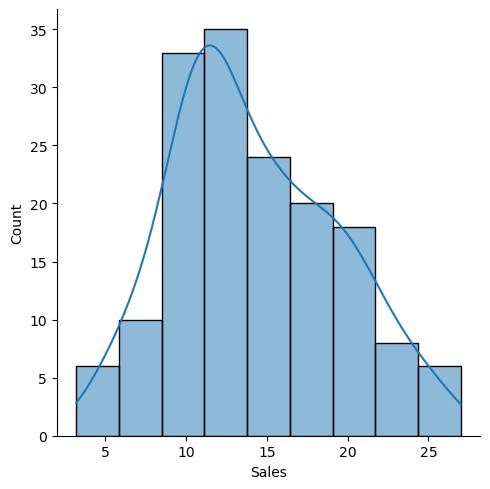

In [11]:
# distribution plot of the target variable
sns.displot(y_train, kde=True)

# statistical test
# computing the p-value for the null-hypothesis that this distribution is a normal distribution
from scipy import stats
_, p = stats.normaltest(y_train)
print(p)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# train scaler
X_train_scaled = sc.fit_transform(X_train)
print(X_train_scaled[0:10])
# apply scaler on test set
X_test_scaled = sc.transform(X_test)
#print(X_val_scaled[0:10])
print("Mean of first feature:", np.mean(X_train_scaled[:,0]), "\nStdev of first feature:", np.std(X_train_scaled[:,0]))

[[-1.34155345  1.0355176   1.65941078]
 [-1.4053143   0.08249594 -1.30629738]
 [-0.08995151  0.40243892 -0.81980897]
 [ 0.69761311 -0.18979597 -0.90868666]
 [ 0.76609699  0.01442296  1.28518893]
 [-0.56461564  0.42286082 -1.01627544]
 [-1.67570755 -1.44914602 -1.36243065]
 [-1.57770476  1.38268978  2.77272078]
 [-0.29304164  0.91979354  2.29558792]
 [-0.54218127 -1.20408331  0.19994556]]
Mean of first feature: 2.0816681711721685e-17 
Stdev of first feature: 1.0


[-0.6210696  -0.91685477  0.23555867  0.40379751  0.62134625  0.04299781
 -2.19197316 -1.10834948  0.40379751 -0.71021751]
0.39475246295931027
[-0.51177499 -1.18226717 -1.10834948  1.96413447 -0.42595573 -1.10834948
 -1.49108487 -0.11572332 -0.98774881  0.53159621]


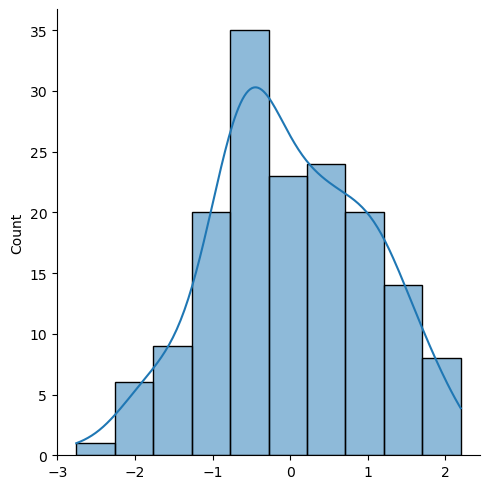

In [13]:
# y - transformation (box cox)
from sklearn.preprocessing import PowerTransformer
pt_bc = PowerTransformer(method='box-cox')
# Target variable values are transformed to be unskewed
# Apply box-cox on training dataset
# and then use .ravel()  tolatten 2D array to 1D array
y_train_unskewed = pt_bc.fit_transform(y_train.to_frame()).ravel()
print(y_train_unskewed[0:10])
_, p = stats.normaltest(y_train_unskewed)
print(p)
sns.displot(y_train_unskewed, kde=True)

# to apply box-cox transformation to test data set to avoid data leakage
y_test_unskewed = pt_bc.transform(y_test.to_frame()).ravel()
print(y_test_unskewed[0:10])

In [14]:
lregr_scaled = LinearRegression()

# train model (Fit linear model) and evaluate model β coefficients
# Standardized
model_scaled = lregr_scaled.fit(X_train_scaled, y_train_unskewed)
# print model intercept
print("β0 =", model_scaled.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model_scaled.coef_)

# estimate residuals
# predict
y_pred_unskewed = model_scaled.predict(X_test_scaled)

residuals_unskewed =  pt_bc.inverse_transform(y_test_unskewed.reshape(-1, 1)) - pt_bc.inverse_transform(y_pred_unskewed.reshape(-1, 1))
print('Residuals:', residuals_unskewed[:10])
#print(np.mean(residuals_unskewed))
#print(np.std(residuals_unskewed))

β0 = 2.5622693713054546e-16
[β1,β2,β3] = [ 0.76046137  0.54112526 -0.00710177]
Residuals: [[ 1.43775416]
 [ 0.59612666]
 [ 1.10898402]
 [ 0.16679105]
 [-0.12621168]
 [ 1.52707582]
 [-4.8662803 ]
 [-1.71205256]
 [-1.16411516]
 [ 0.58591876]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [15]:
# METRICS ON THE ORIGINAL DATASET
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# prediction on test data
# Unstandardized model
y_pred = model.predict(X_test)
print(y_pred[0:10])

# Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)
print("MSE:" , MSE, ", RMSE:", RMSE, ", R2:", r2)

[10.05739563  7.4522807   7.0197076  24.08029725 12.01786259  6.53793858
 12.78286918 15.10974587 10.76974013 16.34357951]
MSE: 4.402118291449682 , RMSE: 2.0981225634956795 , R2: 0.8601145185017869


In [16]:
# Standardized model
y_pred_unskewed = model_scaled.predict(X_test_scaled)
print(y_pred_unskewed[0:10])

# Mean Squared Error (MSE)
MSE_scaled = mean_squared_error(y_test_unskewed, y_pred_unskewed)
# Root Mean Squared Error (RMSE)
RMSE_scaled = np.sqrt(MSE_scaled)
r2_scaled = r2_score(y_test_unskewed, y_pred_unskewed)
print("MSE:",MSE_scaled,", RMSE:", RMSE_scaled, ", R2:", r2_scaled)

# REVERSE TRANSFORMATION TO BRING target values to the original scale
y_pred_inverse = pt_bc.inverse_transform(y_pred_unskewed.reshape(-1, 1))
print(y_pred_inverse[0:10])

# Mean Squared Error (MSE)
MSE_inverse = mean_squared_error(y_test, y_pred_inverse)
# Root Mean Squared Error (RMSE)
RMSE_inverse = np.sqrt(MSE_inverse)
r2_inverse = r2_score(y_test, y_pred_inverse)
print("MSE:",MSE_inverse,", RMSE:", RMSE_inverse, ", R2:", r2_inverse)

[-0.83262996 -1.33290423 -1.38798611  1.93937848 -0.39916256 -1.49831956
 -0.34856484  0.21886876 -0.71829278  0.42480185]
MSE: 0.2670809327659692 , RMSE: 0.5167987352596456 , R2: 0.7952680962371333
[[ 9.86224584]
 [ 7.80387334]
 [ 7.59101598]
 [25.23320895]
 [11.82621168]
 [ 7.17292418]
 [12.0662803 ]
 [14.91205256]
 [10.36411516]
 [16.01408124]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


MSE: 3.5160611277863354 , RMSE: 1.8751162971363498 , R2: 0.8882706298935984
